In [123]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [124]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [125]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
classes = np.unique(y_train)
print(classes)
print("classes count:",len(classes))

[0 1 2 3 4 5 6 7 8 9]
classes count: 10


Text(0.5, 1.0, 'Ground truth:9')

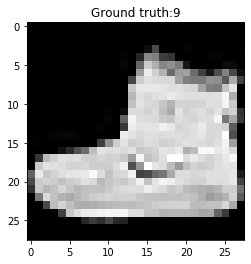

In [128]:
plt.imshow(x_train[0],cmap="gray")
plt.title("Ground truth:{}".format(y_train[0]))

In [129]:
print(y_train[0])

9


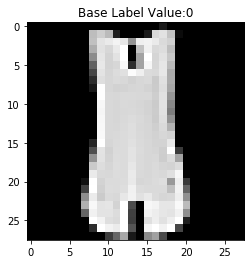

In [130]:
for i in range(5):
    plt.imshow(x_train[i],cmap='gray')
    plt.title("Base Label Value:{}".format(y_train[i]))

In [131]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [132]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [133]:
x_train.dtype

dtype('uint8')

In [134]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

In [135]:
x_train.shape

(60000, 28, 28, 1)

In [136]:
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)

In [137]:
from sklearn.model_selection import train_test_split  ##sPLITTING FOR TRAIN & VALIDATION DATASETS==> FORGOT TO USE SEPARATE VARIABLES
x_train,y_train,val_train,val_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [138]:
x_train.shape, y_train.shape,val_train.shape, val_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [139]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [140]:
batch_size = 64
epochs = 20
num_classes = 10

In [141]:
# model = Sequential()
# #Input Layer - Hidden Layer - I starts here...!
# model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
# model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPooling2D((2,2),padding='same'))
# #Hidden layer - II Starts here...!
# model.add(Conv2D(64, kernel_size=(3,3), activation='linear',padding='same'))
# model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
# #Hidden layer-3 starts here...!
# model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
# model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
# #Flattening..!
# model.add(Flatten())
# #Creating a dense layer..!
# model.add(Dense(128,activation='linear'))
# model.add(LeakyReLU(alpha=0.1))
# #Output layer..!
# model.add(Dense(num_classes,activation='softmax'))

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [142]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 7, 7, 128)       

In [143]:
from keras.optimizers import Adam
fashion_model.compile(loss = keras.losses.categorical_crossentropy, optimizer='Adam',metrics=['accuracy'])

In [145]:
#model = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(val_train,val_test))
fashion_model = fashion_model.fit(x_train,val_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(y_train,val_test))


ValueError: Error when checking target: expected dense_13 to have shape (10,) but got array with shape (1,)

In [147]:
x_train.shape, y_train.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

In [146]:
fashion_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_42 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7, 128)       

In [148]:
fashion_model = fashion_model.fit(x_train,val_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(y_train,val_test))

ValueError: Error when checking target: expected dense_13 to have shape (10,) but got array with shape (1,)

In [151]:
x_train.shape,val_train.shape, y_train.shape, val_test.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

# Cleaned Code:::

In [2]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()#input_shape = (img_width, img_height, 1)

Using TensorFlow backend.


In [4]:
import os
os.listdir('train_X')

FileNotFoundError: [Errno 2] No such file or directory: 'train_X'

In [153]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [154]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

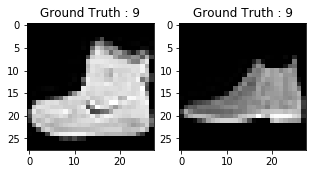

In [155]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [156]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [157]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [158]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [159]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [160]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [161]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [162]:
batch_size = 64
epochs = 20
num_classes = 10

In [163]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [164]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [165]:
fashion_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 7, 7, 128)       

In [166]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 63s 1ms/step - loss: 0.4647 - accuracy: 0.8289 - val_loss: 0.3350 - val_accuracy: 0.8741
Epoch 2/20
48000/48000 [==============================] - 74s 2ms/step - loss: 0.2885 - accuracy: 0.8949 - val_loss: 0.2709 - val_accuracy: 0.8997
Epoch 3/20
48000/48000 [==============================] - 81s 2ms/step - loss: 0.2396 - accuracy: 0.9121 - val_loss: 0.2576 - val_accuracy: 0.9061
Epoch 4/20
48000/48000 [==============================] - 72s 2ms/step - loss: 0.2071 - accuracy: 0.9235 - val_loss: 0.2595 - val_accuracy: 0.9049
Epoch 5/20
48000/48000 [==============================] - 74s 2ms/step - loss: 0.1814 - accuracy: 0.9340 - val_loss: 0.2302 - val_accuracy: 0.9155
Epoch 6/20
48000/48000 [==============================] - 76s 2ms/step - loss: 0.1592 - accuracy: 0.9409 - val_loss: 0.2264 - val_accuracy: 0.9199
Epoch 7/20
48000/48000 [==============================] - 74s 2ms/st

In [167]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [168]:
print("Test Loss:", test_eval[0])
print("Test accuracy:",test_eval[1])

Test Loss: 0.5080149368087761
Test accuracy: 0.9125999808311462


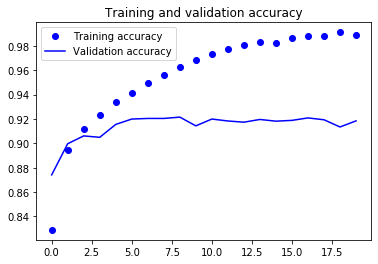

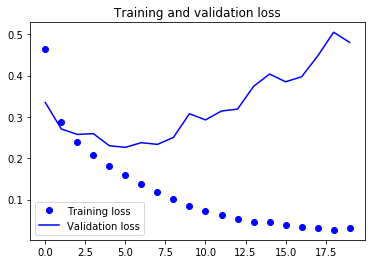

In [171]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [172]:
batch_size = 64
epochs = 20
num_classes = 10

In [173]:
m_classes = 10
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [174]:
fashion_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_50 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 7, 7, 64)        

In [175]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [176]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 90s 2ms/step - loss: 0.6057 - accuracy: 0.7733 - val_loss: 0.3721 - val_accuracy: 0.8627
Epoch 2/20
48000/48000 [==============================] - 86s 2ms/step - loss: 0.3810 - accuracy: 0.8598 - val_loss: 0.3174 - val_accuracy: 0.8867
Epoch 3/20
48000/48000 [==============================] - 87s 2ms/step - loss: 0.3288 - accuracy: 0.8777 - val_loss: 0.2920 - val_accuracy: 0.8895
Epoch 4/20
48000/48000 [==============================] - 83s 2ms/step - loss: 0.3011 - accuracy: 0.8880 - val_loss: 0.2639 - val_accuracy: 0.9015
Epoch 5/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.2799 - accuracy: 0.8958 - val_loss: 0.2535 - val_accuracy: 0.9074
Epoch 6/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.2714 - accuracy: 0.8970 - val_loss: 0.2397 - val_accuracy: 0.9092
Epoch 7/20
48000/48000 [==============================] - 84s 2ms/st

In [177]:
fashion_model.save("fashion_model_dropout.h5py")

In [178]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)


10000/10000 [==============================] - 5s 457us/step


In [179]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2312629468202591
Test accuracy: 0.9164000153541565


In [180]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

KeyError: 'acc'

In [ ]:
predicted_classes = fashion_model.predict(test_X)


In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape


In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print "Found %d correct labels" % len(correct)
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print "Found %d incorrect labels" % len(incorrect)
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))